# Task 3

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
plt.style.use('../report.mplstyle')


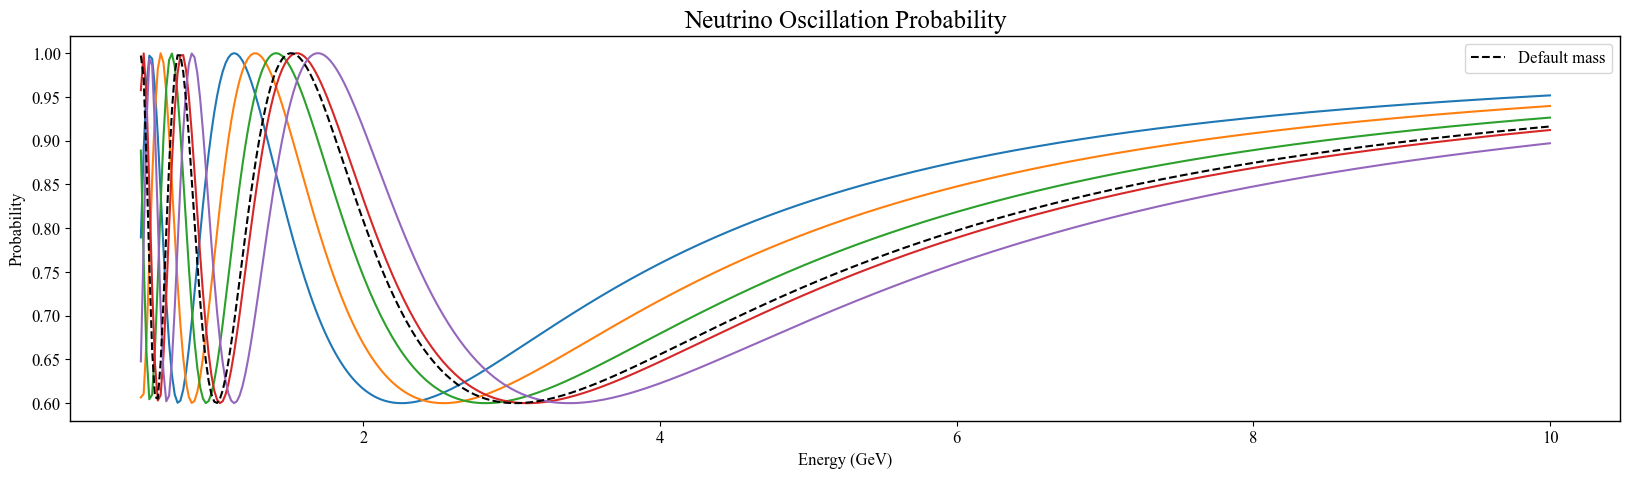

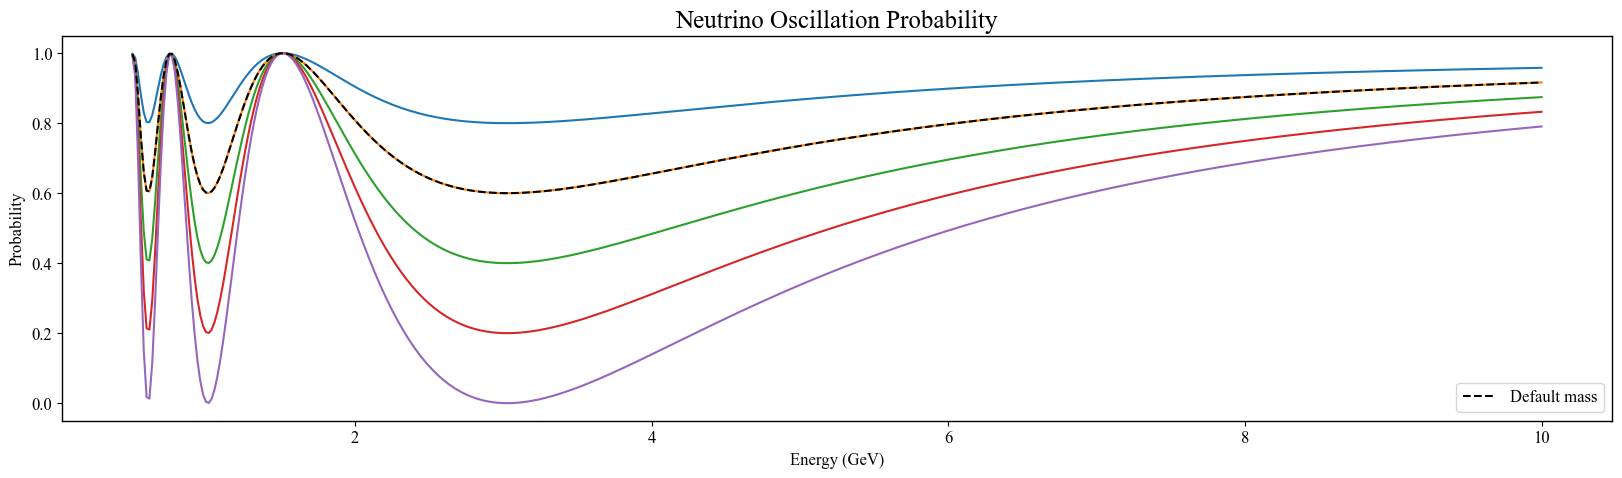

In [50]:
DEFAULT_VAL = {'energy':np.linspace(0.5,10,500),'amp':0.4,'base':1400,'mass':2.68e-3}

def neu_prob(En = DEFAULT_VAL['energy'],amp = DEFAULT_VAL['amp'],base = DEFAULT_VAL['base'],mass = DEFAULT_VAL['mass']):
    return 1- amp*np.sin(1.267*mass*base/En)**2


mass_range = np.linspace(2e-3,3e-3,5)

plt.figure(figsize = (20,5))
for i in range(5):
    plt.plot(DEFAULT_VAL['energy'],neu_prob(mass = mass_range[i]))
plt.plot(DEFAULT_VAL['energy'],neu_prob(),label = 'Default mass',linestyle = '--',color = 'black')
plt.xlabel('Energy (GeV)')
plt.ylabel('Probability') 
plt.title('Neutrino Oscillation Probability')
plt.legend()
plt.show()

amp_range= np.linspace(2e-1,1,5)

plt.figure(figsize = (20,5))
for i in range(5):
    plt.plot(DEFAULT_VAL['energy'],neu_prob(amp = amp_range[i]))
plt.plot(DEFAULT_VAL['energy'],neu_prob(),label = 'Default mass',linestyle = '--',color = 'black')
plt.xlabel('Energy (GeV)')
plt.ylabel('Probability') 
plt.title('Neutrino Oscillation Probability')
plt.legend()
plt.show()

# plt.figure(figsize=(10,5))
# plt.plot(DEFAULT_VAL['energy'],neu_prob())
# plt.plot(DEFAULT_VAL['energy'],neu_prob(mass = 3e-3))
# plt.xlabel('Energy (GeV)')
# plt.ylabel('Probability')
# plt.title('Neutrino Oscillation Probability')
# plt.show()

# plt.figure(figsize=(10,5))
# plt.plot(DEFAULT_VAL['energy'],neu_prob(mass = 3e-3))
# plt.xlabel('Energy (GeV)')
# plt.ylabel('Probability')
# plt.title('Neutrino Oscillation Probability')
# plt.show()


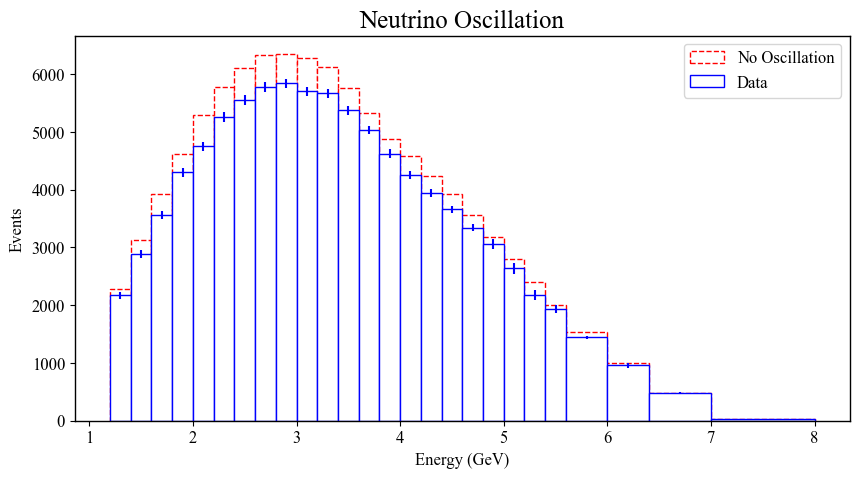

In [52]:
data = np.loadtxt('reno.dat')
data = pd.DataFrame(data,columns = ['e_min','e_max','data','data_err','pred_no_osc'])


e_avg = (data['e_min']+data['e_max'])/2
e_rng = (data['e_max']-data['e_min'])

bin_edges = np.union1d(data['e_min'],data['e_max'])

plt.figure(figsize=(10,5))
plt.hist(e_avg,bins = bin_edges,weights = data['pred_no_osc'],label = 'No Oscillation',color = 'white',edgecolor = 'red',linestyle = '--')
plt.hist(e_avg,bins = bin_edges,weights = data['data'],label = 'Data',color = 'white',edgecolor = 'blue')
plt.errorbar(e_avg,data['data'],yerr = data['data_err'],fmt = 'none',color = 'blue')
plt.xlabel('Energy (GeV)')
plt.ylabel('Events')
plt.title('Neutrino Oscillation')
plt.legend()
plt.show()
